## Second Code Iteration :

Changes incorporated : 

* Introduced Dropout (0.1), retaining Batch norm in every layer

* Split batch size - (32 & 256) , epochs 10 each 

* Reduced number of filters/ channels in every layer above MP

 Paramters - **15,424**
Accuracy-   **99.29**

In [1]:
# Import the necessary packages

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing necessary modules from the library 
import numpy as np

from keras.models import Sequential #Sequential model is a linear stack of layers.
from keras.layers import Dense, Dropout, Activation, Flatten, Add 
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # split the dataset into testing and training samples

(60000, 28, 28)


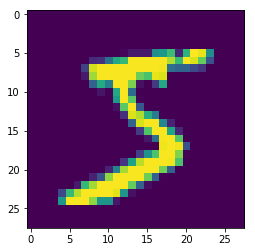

In [4]:
print (X_train.shape) 
from matplotlib import pyplot as plt # Matplotlib is a Python 2D plotting library. 
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Changing the size of array to include channel information

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 # making values 0 to 1 , normalising it so while multiplying value doesn't increase

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# dropout , reduce epochs and batch size  , sgd

from keras.layers import Activation
model = Sequential()



 #8 convolution filters of size 3x3
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1)))  #Output image : 26x26x8 , RF: 3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3)) #24x24x12 , RF: 5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3)) #22x22x16 , RF: 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(2)) #11x11x16 , RF: 14x14

model.add(Convolution2D(20, 3, 3)) #9x9x20, RF: 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(24, 3, 3)) #7x7x24 , RF: 18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1)) #7x7x10 , RF:18x18

model.add(Convolution2D(10, 7))#1x1x10, RF:28x28
model.add(Flatten()) #Converts input shape (1,1,10) to 1D of 10nvolution2D(10, 3, 3,activation ='relu', input_shape=(28,28,1)))  #Output image : 26x26x8 , RF: 3x3



model.add(Activation('softmax'))  # input to Softmax is 10X1

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1...)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3))`


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)        0         
__________

In [0]:
# Configure the learning process, using the compile method.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) # Train the model, iterating on the data in batches of 32 samples for 10 epochs

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 360s 6ms/step - loss: 0.1687 - acc: 0.9468
Epoch 2/10
60000/60000 [==============================] - 369s 6ms/step - loss: 0.0635 - acc: 0.9800
Epoch 3/10
60000/60000 [==============================] - 361s 6ms/step - loss: 0.0499 - acc: 0.9843
Epoch 4/10
60000/60000 [==============================] - 349s 6ms/step - loss: 0.0425 - acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0388 - acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0349 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0318 - acc: 0.9894
Epoch 8/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0288 - acc: 0.9905
Epoch 9/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0266 - acc: 0.9912
Epoch 10/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0267 - a

In [15]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1) # Train the model, iterating on the data in batches of 256 samples for 10 epochs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0111 - acc: 0.9965
Epoch 2/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0117 - acc: 0.9962
Epoch 3/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0112 - acc: 0.9962
Epoch 4/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0115 - acc: 0.9960
Epoch 5/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0102 - acc: 0.9965
Epoch 6/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0105 - acc: 0.9962
Epoch 7/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0092 - acc: 0.9971
Epoch 8/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0107 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0107 - acc: 0.9964
Epoch 10/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0095 - a

In [16]:
# Score is the evaluation of the loss function for a given input.
score = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 10s 976us/step


In [17]:
print(score)  # [Loss/Cross Entropy Value, Accuracy]

[0.022552279580690084, 0.9933]
